# diseases prediction

Objective: Build a machine learning project for disease prediction to classify the risk of heart attack, diabetes,liver diseases, and kidney disease. Develop models based on relevant features such as age, gender, cholesterol levels, blood pressure, BMI, family history, glucose levels, lifestyle habits, CT scan data, and biomarkers. Create a user-friendly web-based tool where individuals can input their health information, and the models provide predictions for their risk of these diseases. Additionally, offer personalized recommendations and guidance on preventive measures, lifestyle changes, further diagnostic procedures, or treatment options based on the predicted risks, empowering users to make informed decisions about their health.


Links of datasetes:
Heart Faliure : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

Diabetes Prediction : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

liver diseases : https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

Kidney Diseases : https://www.kaggle.com/datasets/mansoordaku/ckdisease

In [1]:
#importing importance library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
heart=pd.read_csv('heart.csv')

In [3]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
heart.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Attribute Information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] HeartDisease: output class [1: heart disease, 0: Normal]

In [7]:
heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The provided DataFrame contains 918 entries and 12 columns. It consists of various data types: 1 column is of type float64, 6 columns are of type int64, and 5 columns are of type object and 86.2+ KB memory uses

In [8]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


There is no biological possibility of having a total cholesterol level of exactly 0 mg/dL and RestingBP is 0.


In [9]:
heart=heart[heart['RestingBP']>40]
heart=heart[heart['Cholesterol']>60]
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
heart.nunique()

Age                49
Sex                 2
ChestPainType       4
RestingBP          63
Cholesterol       221
FastingBS           2
RestingECG          3
MaxHR             109
ExerciseAngina      2
Oldpeak            43
ST_Slope            3
HeartDisease        2
dtype: int64

# checking null values

In [11]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There is no null values present in this dataset

In [12]:
for i in heart:
    print(i)
    print(heart[i].unique())

Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 77 67 72 75 64 69 68 74 76 70
 71]
Sex
['M' 'F']
ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133 126 139 134 152
 141 137 146 158 123  96 144 131 143 116 104 172 156 114 127 101 174  94
 148 178 165 117 192 129 102 154 164]
Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 1

# separate categorical and numerical columns

In [13]:
cat_col=heart.select_dtypes(object)
cat_col.head(2)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat


In [14]:
num_col=heart.select_dtypes(['int','float'])

In [15]:
num_col

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


# lets do some EDA on heart dataset

# distribution of num data

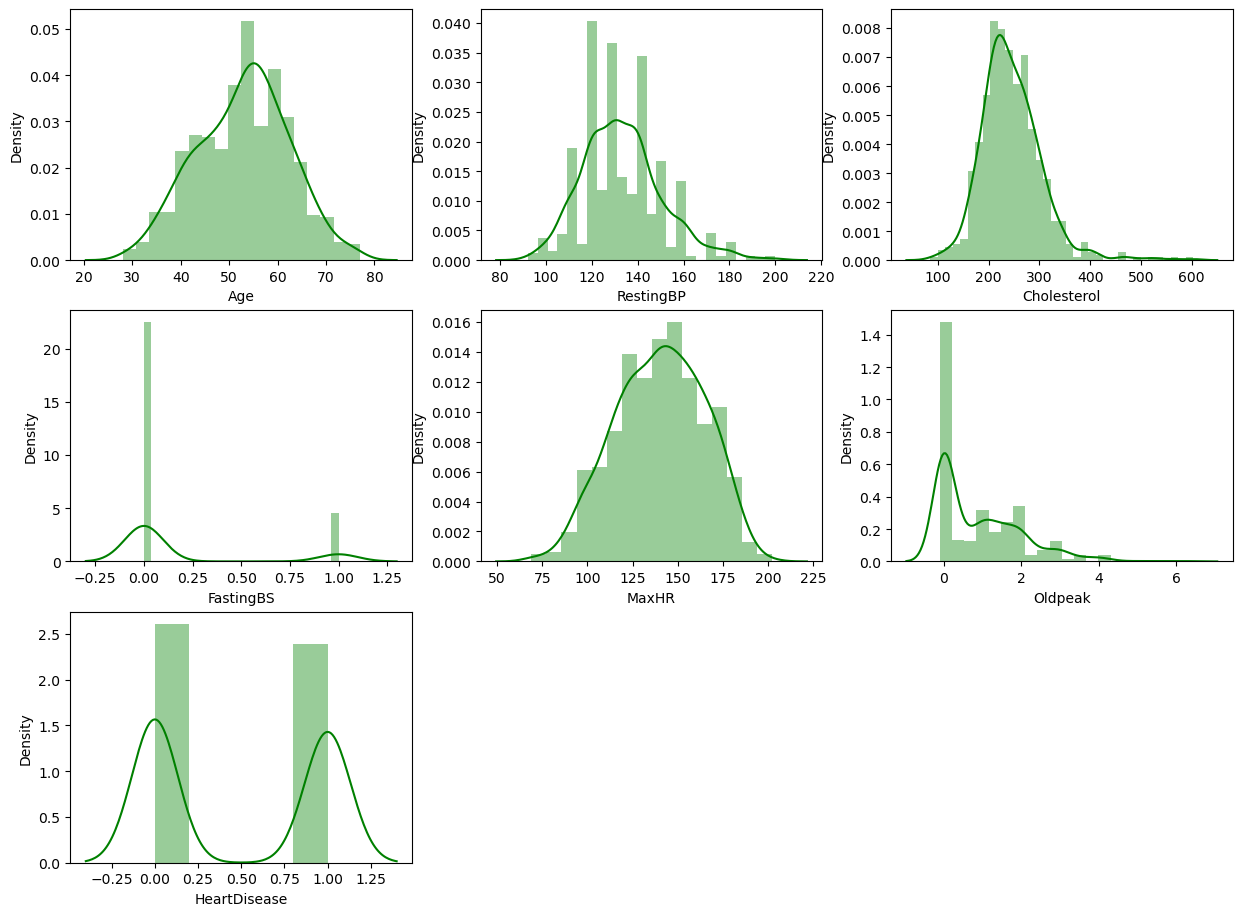

In [16]:
plt.figure(figsize= (15,15))
count=1
for i in num_col:
    
    plt.subplot(4,3,count)
    sns.distplot(num_col[i],color='green')
    count+=1
plt.show()

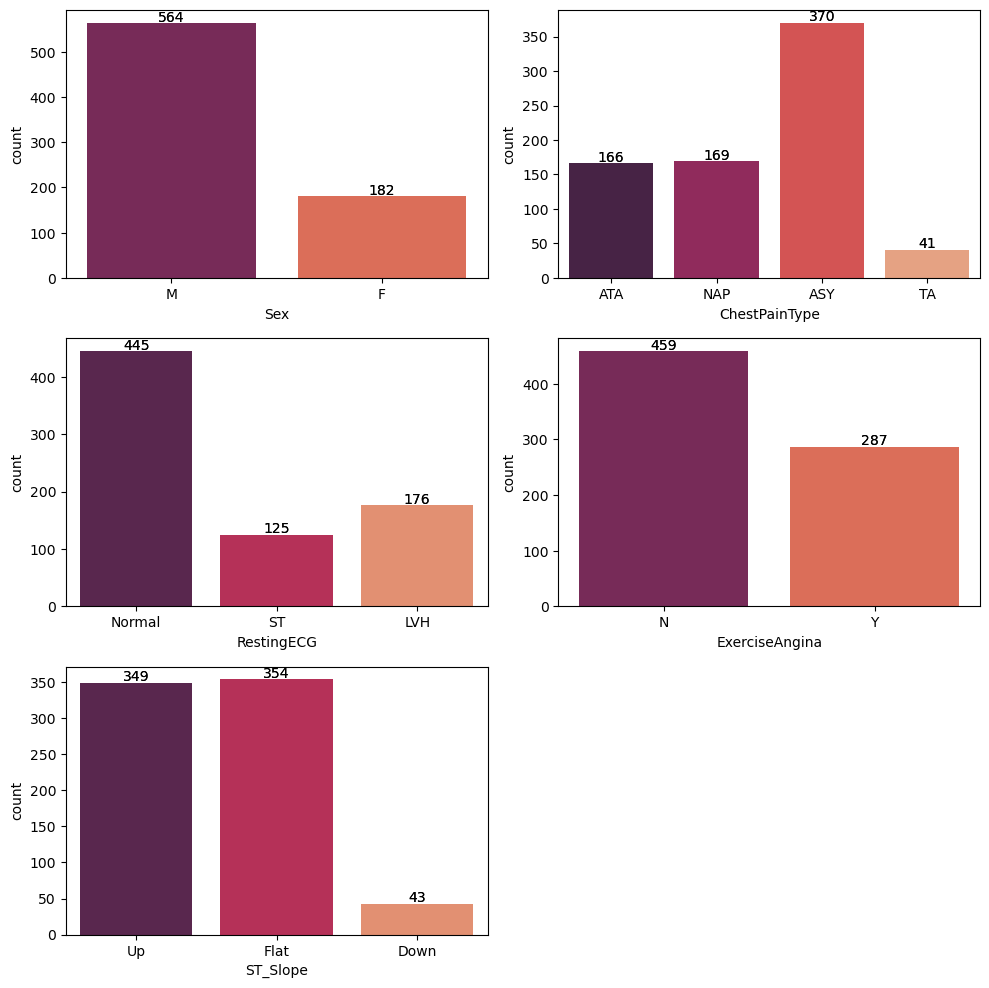

In [17]:
plt.figure(figsize=(10, 10))
count = 1

for i in cat_col:
    plt.subplot(3, 2, count)
    sns.countplot(cat_col[i], palette='rocket')
    plt.xlabel(i)

    # Adding text labels for each bar
    for p in sns.countplot(cat_col[i], palette='rocket').patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2., height + 3, height, ha="center")

    count += 1

plt.tight_layout()
plt.show()

from above graphs we know that
This dataset have maximum male i.e 564

370 peoples have highest chest pain type i.e ASY

445 peoples have normal ECG

In [18]:
import matplotlib.pyplot as plt

def plot_scatter_heart(data, x_column, y_column, title, xlabel, ylabel):
    
    plt.scatter(data[x_column], data[y_column])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

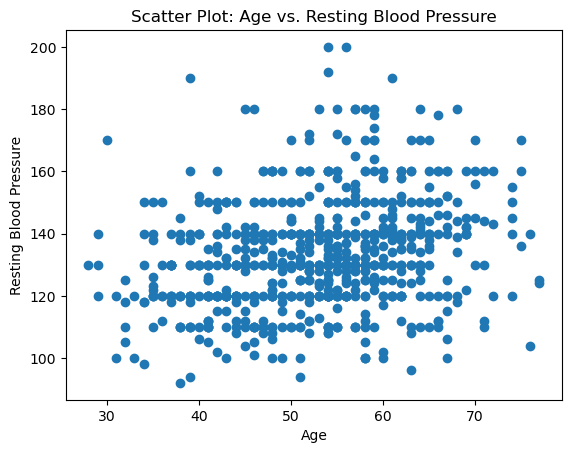

In [19]:
plot_scatter_heart(heart, 'Age', 'RestingBP', 'Scatter Plot: Age vs. Resting Blood Pressure', 'Age', 'Resting Blood Pressure')


<AxesSubplot:ylabel='ChestPainType'>

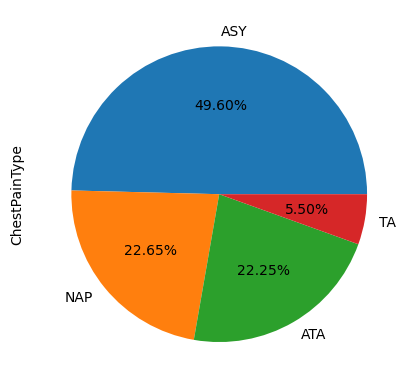

In [20]:
heart['ChestPainType'].value_counts().plot(kind='pie',autopct= "%.2f%%")


<AxesSubplot:>

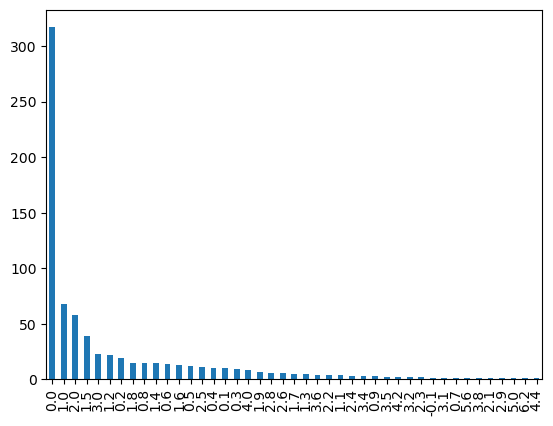

In [21]:
heart['Oldpeak'].value_counts().plot(kind='bar')


In [22]:
heart.nunique()


Age                49
Sex                 2
ChestPainType       4
RestingBP          63
Cholesterol       221
FastingBS           2
RestingECG          3
MaxHR             109
ExerciseAngina      2
Oldpeak            43
ST_Slope            3
HeartDisease        2
dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

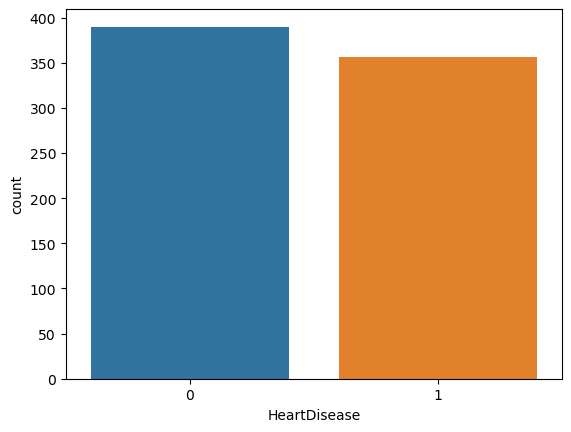

In [23]:
sns.countplot(heart['HeartDisease'])


In [24]:
cat_col.columns


Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [25]:
heart.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.259865,0.058758,0.241338,-0.382112,0.286006,0.298617
RestingBP,0.259865,1.000000,0.095939,0.173765,-0.125774,0.198575,0.173242
Cholesterol,0.058758,0.095939,1.000000,0.054012,-0.019856,0.058488,0.103866
FastingBS,0.241338,0.173765,0.054012,1.000000,-0.102710,0.055568,0.160594
MaxHR,-0.382112,-0.125774,-0.019856,-0.102710,1.000000,-0.259533,-0.377212
Oldpeak,0.286006,0.198575,0.058488,0.055568,-0.259533,1.000000,0.495696
HeartDisease,0.298617,0.173242,0.103866,0.160594,-0.377212,0.495696,1.000000


<AxesSubplot:>

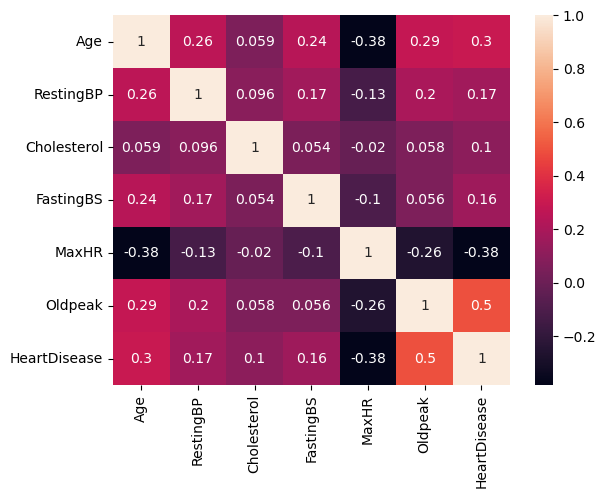

In [26]:
sns.heatmap(heart.corr(),annot=True)


In [27]:
corr=heart.corr()['HeartDisease'].reset_index()
corr.sort_values('HeartDisease',ascending=False)

,index,HeartDisease
6,HeartDisease,1.000000
5,Oldpeak,0.495696
0,Age,0.298617
1,RestingBP,0.173242
3,FastingBS,0.160594
2,Cholesterol,0.103866
4,MaxHR,-0.377212


# encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
for i in cat_col:
    cat_col[i]=le.fit_transform(cat_col[i])
    print(cat_col[i].unique())
    print(le.classes_)

[1 0]
['F' 'M']
[1 2 0 3]
['ASY' 'ATA' 'NAP' 'TA']
[1 2 0]
['LVH' 'Normal' 'ST']
[0 1]
['N' 'Y']
[2 1 0]
['Down' 'Flat' 'Up']


In [30]:
cat_col.head(1)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2


In [31]:
num_col.head(1)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0


In [32]:
# Reset the index for both DataFrames
cat_col.reset_index(drop=True, inplace=True)
num_col.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames
heart = pd.concat([num_col, cat_col], axis=1)


In [33]:
heart

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,0,1,1,1,0,2
1,49,160,180,0,156,1.0,1,0,2,1,0,1
2,37,130,283,0,98,0.0,0,1,1,2,0,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,110,264,0,132,1.2,1,1,3,1,0,1
742,68,144,193,1,141,3.4,1,1,0,1,0,1
743,57,130,131,0,115,1.2,1,1,0,1,1,1
744,57,130,236,0,174,0.0,1,0,1,0,0,1


In [34]:
num_col

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
741,45,110,264,0,132,1.2,1
742,68,144,193,1,141,3.4,1
743,57,130,131,0,115,1.2,1
744,57,130,236,0,174,0.0,1


In [35]:
heart.head(1)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,0,1,1,1,0,2


In [36]:
heart.dtypes

Age                 int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
MaxHR               int64
Oldpeak           float64
HeartDisease        int64
Sex                 int32
ChestPainType       int32
RestingECG          int32
ExerciseAngina      int32
ST_Slope            int32
dtype: object

# split training and testing data

In [85]:
X=heart.drop(['HeartDisease'],axis=1)
X.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
      dtype='object')

In [38]:
y=heart['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
741    1
742    1
743    1
744    1
745    0
Name: HeartDisease, Length: 746, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=123)

In [40]:
Xtrain.shape,Xtest.shape

((596, 11), (150, 11))

In [41]:
ytrain.shape,ytest.shape


((596,), (150,))

# scaling

In [42]:
from sklearn.preprocessing import StandardScaler
se=StandardScaler()

In [43]:
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
Xtrain=se.fit_transform(Xtrain)
Xtest=se.fit_transform(Xtest)

# Training models

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import  XGBClassifier

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [45]:
knn=KNeighborsClassifier(n_neighbors=3)
lr=LogisticRegression()
dt=DecisionTreeClassifier()
ra=RandomForestClassifier()
ad=AdaBoostClassifier()
svm=SVC(probability=True)
gau=GaussianNB()
bag=BaggingClassifier()
Gr=GradientBoostingClassifier()
xg= XGBClassifier()

In [46]:
Training_score= []
Testing_score= []
def model_building(model):
    model.fit(Xtrain, ytrain)
    ytrain_pred= model.predict(Xtrain)
    ytest_pred= model.predict(Xtest)
    a= accuracy_score(ytrain, ytrain_pred)
    b= accuracy_score(ytest, ytest_pred)
    Training_score.append(a)
    Testing_score.append(b)
    print(model)
    print("Train Data\n", accuracy_score(ytrain,ytrain_pred))
    print("Test Data\n", accuracy_score(ytest,ytest_pred))

In [47]:
def roc_auc_curve(model):
    print("ROC-AUC CURVE:")
    ytest_prob= model.predict_proba(Xtest)
    fpr,tpr,thresh=roc_curve(ytest,ytest_prob[:,1])
    print('roc_score')
    roc_score=roc_auc_score(ytest,ytest_prob[:,1])
    
    sns.lineplot(x=fpr,y=tpr)
    sns.lineplot(x=[0.0,1.0],y=[0.0,1.0],color="red",linestyle="--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC-AUC Curve")
    plt.show()
    print(roc_score)

In [48]:
from sklearn.metrics import log_loss

def calculate_logloss(model,ytest):
    print('log_loss:')
    ytest_prob= model.predict_proba(Xtest)

    logloss = log_loss(ytest, ytest_prob[:,-1])
    return logloss

KNeighborsClassifier(n_neighbors=3)
Train Data
 0.9077181208053692
Test Data
 0.8533333333333334
ROC-AUC CURVE:
roc_score


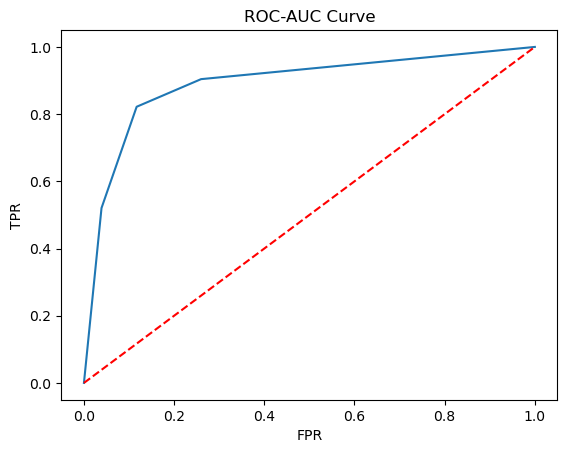

0.8904999110478562
log_loss:


2.4796923918198943

In [49]:
model_building(knn)
roc_auc_curve(knn)
calculate_logloss(knn,ytest)

LogisticRegression()
Train Data
 0.8573825503355704
Test Data
 0.8466666666666667
ROC-AUC CURVE:
roc_score


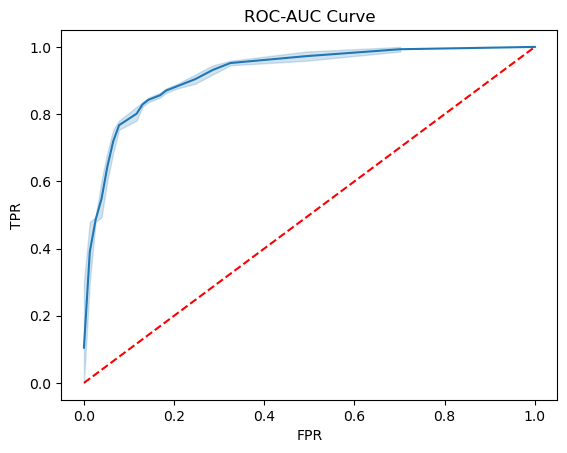

0.9238569649528553
log_loss:


0.35606675012988565

In [50]:
model_building(lr)
roc_auc_curve(lr)
calculate_logloss(lr,ytest)

DecisionTreeClassifier()
Train Data
 1.0
Test Data
 0.8133333333333334
ROC-AUC CURVE:
roc_score


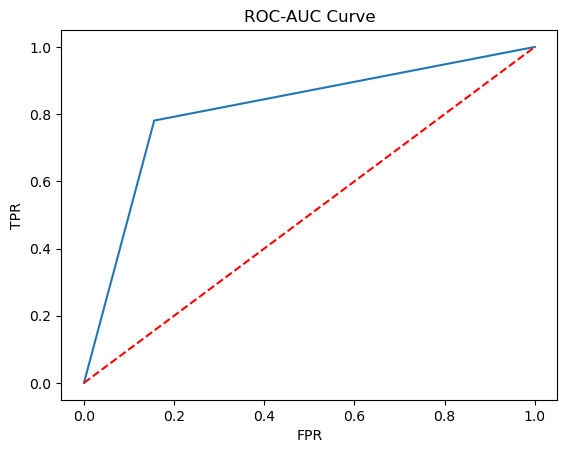

0.8124888809820316
log_loss:


6.447302228177744

In [51]:
model_building(dt)
roc_auc_curve(dt)
calculate_logloss(dt,ytest)

RandomForestClassifier()
Train Data
 1.0
Test Data
 0.8933333333333333
ROC-AUC CURVE:
roc_score


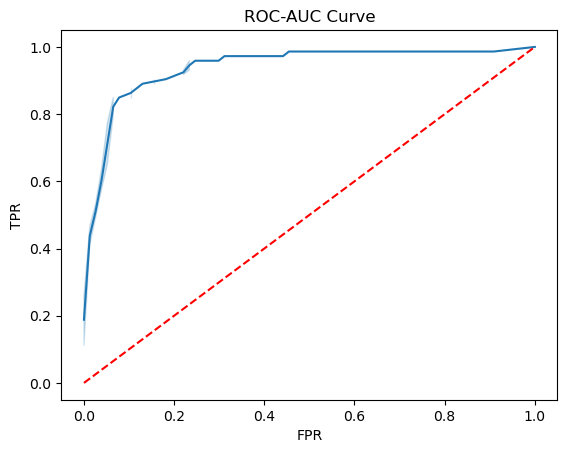

0.9397793986835082
log_loss:


0.5182368282777733

In [52]:
model_building(ra)
roc_auc_curve(ra)
calculate_logloss(ra,ytest)

AdaBoostClassifier()
Train Data
 0.8842281879194631
Test Data
 0.8666666666666667
ROC-AUC CURVE:
roc_score


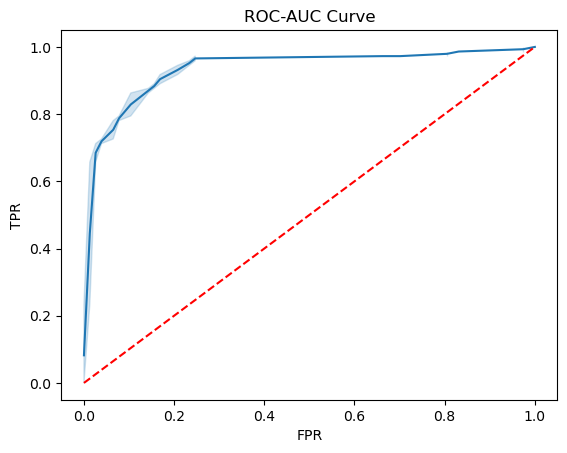

0.9354207436399217
log_loss:


0.6656033891024198

In [53]:
model_building(ad)
roc_auc_curve(ad)

calculate_logloss(ad,ytest)


SVC(probability=True)
Train Data
 0.9093959731543624
Test Data
 0.8733333333333333
ROC-AUC CURVE:
roc_score


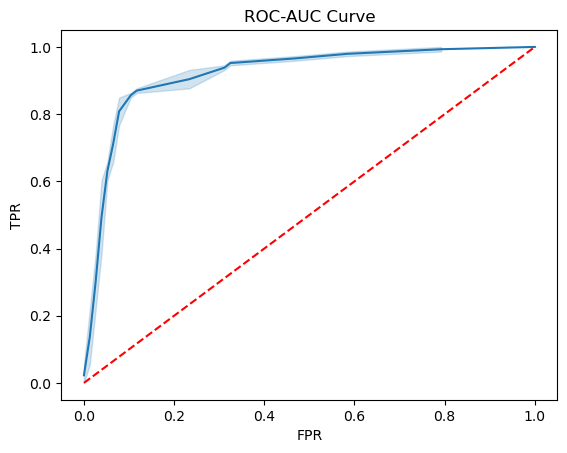

0.9188756449030422
log_loss:


0.3455838357084263

In [54]:
model_building(svm)
roc_auc_curve(svm)
calculate_logloss(svm,ytest)

GaussianNB()
Train Data
 0.8557046979865772
Test Data
 0.84
ROC-AUC CURVE:
roc_score


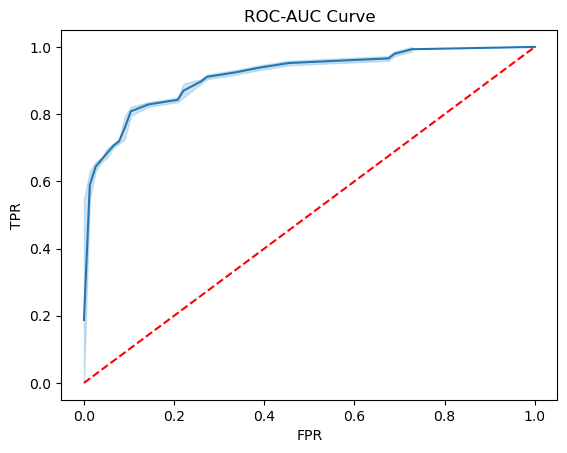

0.9192314534780288
log_loss:


0.5418131464584484

In [55]:
model_building(gau)
roc_auc_curve(gau)
calculate_logloss(gau,ytest)

BaggingClassifier()
Train Data
 0.9848993288590604
Test Data
 0.8666666666666667
ROC-AUC CURVE:
roc_score


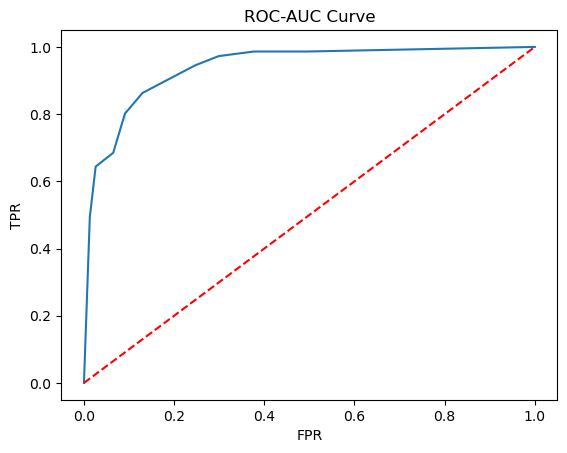

0.9384451165273083
log_loss:


0.7097336131026185

In [56]:
model_building(bag)
roc_auc_curve(bag)
calculate_logloss(bag,ytest)

GradientBoostingClassifier()
Train Data
 0.9614093959731543
Test Data
 0.8733333333333333
ROC-AUC CURVE:
roc_score


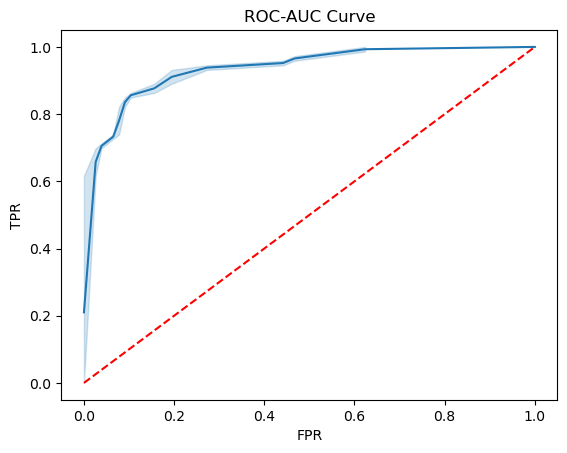

0.9409357765522149
log_loss:


0.31938173189380603

In [57]:
model_building(Gr)
roc_auc_curve(Gr)
calculate_logloss(Gr,ytest)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Train Data
 1.0
Test Data
 0.8733333333333333
ROC-AUC CURVE:
roc_score


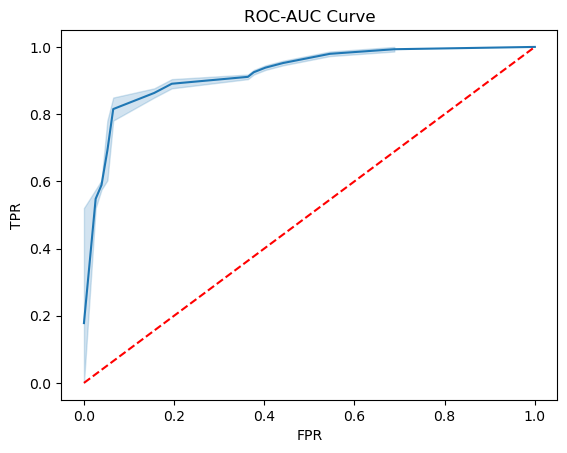

0.9288382850026685
log_loss:


0.4184532735912944

In [58]:
model_building(xg)
roc_auc_curve(xg)
calculate_logloss(xg,ytest)

In [59]:
knn_logloss=calculate_logloss(knn,ytest)
lr_logloss=calculate_logloss(lr,ytest)
dt_logloss=calculate_logloss(dt,ytest)
ra_logloss=calculate_logloss(ra,ytest)
ad_logloss=calculate_logloss(ad,ytest)
svm_logloss=calculate_logloss(svm,ytest)
gau_logloss=calculate_logloss(gau,ytest)
bag_logloss=calculate_logloss(bag,ytest)
Gr_logloss=calculate_logloss(Gr,ytest)
xg_logloss=calculate_logloss(xg,ytest)

log_loss:
log_loss:
log_loss:
log_loss:
log_loss:
log_loss:
log_loss:
log_loss:
log_loss:
log_loss:


In [60]:
Models= ["k-Nearest Neighbors","Logistic Regression" ,"Decision Tree Classifier", "Random forest Classifier" ,
        "Ada-Boosting Classifier","svm","GaussianNB","Bagging Classifier", "Gradiant- Bossting Classifier","XGB"]

In [61]:
score_heart = pd.DataFrame({"Algorithms":Models,
                   "Training Score":Training_score,
                   "Testing Score":Testing_score,
                           'Log Loss': [knn_logloss, lr_logloss, dt_logloss, ra_logloss, ad_logloss,svm_logloss,gau_logloss,bag_logloss,Gr_logloss,xg_logloss]})
score_heart

,Algorithms,Training Score,Testing Score,Log Loss
0,k-Nearest Neighbors,0.907718,0.853333,2.479692
1,Logistic Regression,0.857383,0.846667,0.356067
2,Decision Tree Classifier,1.000000,0.813333,6.447302
3,Random forest Classifier,1.000000,0.893333,0.518237
4,Ada-Boosting Classifier,0.884228,0.866667,0.665603
5,svm,0.909396,0.873333,0.345584
6,GaussianNB,0.855705,0.840000,0.541813
7,Bagging Classifier,0.984899,0.866667,0.709734
8,Gradiant- Bossting Classifier,0.961409,0.873333,0.319382
9,XGB,1.000000,0.873333,0.418453


Based on the scores, the top 2 algorithms to perform hyperparameter tuning are:

Logistic Regression: Training Score: 0.857383 Testing Score: 0.846667 Log Loss: 0.356067

Logistic Regression seems to have a relatively low difference between training and testing scores, indicating it is not heavily overfitting. Additionally, it has a reasonably low log loss, which is beneficial for a heart disease classification model.

Support Vector Machine (SVM): Training Score: 0.909396 Testing Score: 0.873333 Log Loss: 0.344834

SVM also demonstrates a low difference between training and testing scores, suggesting it is not heavily overfitting. Moreover, it achieves a competitive log loss score on the testing data.

# so we do hyper tuning on Logistic  regression and SVM

In [62]:
from sklearn.model_selection import RandomizedSearchCV


# SVM

In [78]:
svm=SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4]
}

In [79]:
svm_reg = RandomizedSearchCV(svm, param_distributions=param_grid, n_iter=10, cv=5,n_jobs=-1)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto', 0.1, 1],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})
Train Data
 0.9144295302013423
Test Data
 0.88
ROC-AUC CURVE:
roc_score


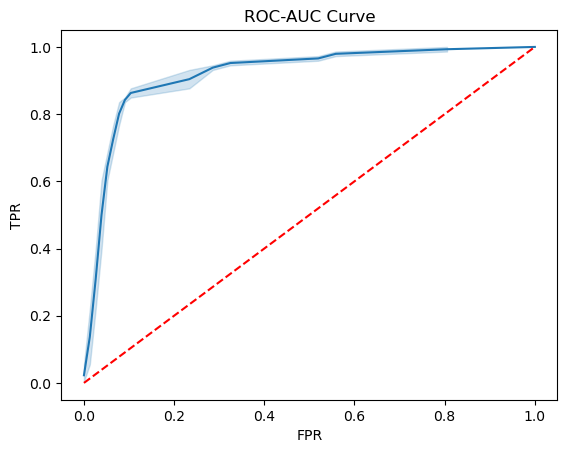

0.9192314534780287
log_loss:


0.34728759317430136

In [80]:
model_building(svm_reg)
roc_auc_curve(svm_reg)
calculate_logloss(svm_reg,ytest)

# Logictics Regression

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = {
    'C':np.arange(1,51),
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300],'class_weight':[None,'balanced']
}

In [68]:
lr_reg=GridSearchCV(lr,param_grid=param_grid,scoring='f1_macro',cv=5)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='f1_macro')
Train Data
 0.8573825503355704
Test Data
 0.8466666666666667
ROC-AUC CURVE:
roc_score


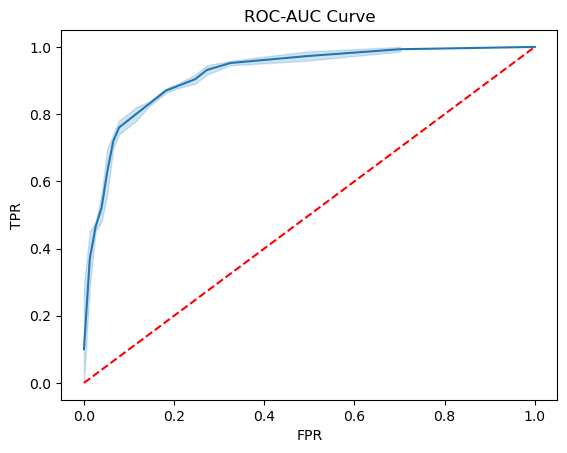

0.922611634940402
log_loss:


0.35649676968270966

In [69]:
model_building(lr_reg)
roc_auc_curve(lr_reg)
calculate_logloss(lr_reg,ytest)

we Select Logictics Regression as our best algorithm for this dataset

In [70]:
import pickle

In [81]:
pickle.dump(lr_reg,open('heartmodel6.pkl','wb'))
pickle.dump(se,open('heartscaling6.pkl','wb'))

In [71]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,1,1,1,0,2
1,49,160,180,0,156,1.0,0,2,1,0,1
2,37,130,283,0,98,0.0,1,1,2,0,2
3,48,138,214,0,108,1.5,0,0,1,1,1
4,54,150,195,0,122,0.0,1,2,1,0,2


In [72]:
new_data = pd.DataFrame({
    'Age': [40],  
    'Sex': [1], 
    'ChestPainType': [1],  
    'RestingBP': [140],  
    'Cholesterol': [289],  
    'FastingBS': [0],  
    'RestingECG': [1],'MaxHR': [172],'ExerciseAngina': [0],'Oldpeak': [0.0],'ST_Slope': [2]})

In [73]:
new_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2


In [74]:
prediction=lr_reg.predict(new_data)

In [75]:
prediction[0]

0

In [76]:
heart.head(1)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,0,1,1,1,0,2


In [77]:
heart.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina',
       'ST_Slope'],
      dtype='object')